# **Image to text**

**Import libraries**

In [2]:
import easyocr
from matplotlib import pyplot as plt
import cv2

**original image**

In [4]:
image_url = 'Sector_General_SH_Book.png'
image_org = cv2.imread(image_url)

In [5]:
read = easyocr.Reader(['en'])
res_org  = read.readtext(image_org)
res_org

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[941, 212], [1367, 212], [1367, 314], [941, 314]],
  'the BiG TIME',
  0.17027690149690786),
 ([[1041, 307], [1359, 307], [1359, 351], [1041, 351]],
  'Twelve General Hospital had a',
  0.8483249083568907),
 ([[967, 326], [1046, 326], [1046, 357], [967, 357]],
  'Sector',
  0.9999943546257334),
 ([[1135, 331], [1377, 331], [1377, 371], [1135, 371]],
  'divided among sixty or',
  0.7388967807619263),
 ([[951, 343], [1143, 343], [1143, 381], [951, 381]],
  'staff of thousands',
  0.8120258242884791),
 ([[1172, 352], [1380, 352], [1380, 393], [1172, 393]],
  'Every day it treated',
  0.7274427837373393),
 ([[952, 382], [984, 382], [984, 406], [952, 406]], 'SO', 0.4306492204730338),
 ([[975, 361], [1355, 361], [1355, 421], [975, 421]],
  'antelligees speciebafflinegcdaplereay',
  0.16748634274440655),
 ([[978, 395], [1126, 395], [1126, 428], [978, 428]],
  'alien illnesses',
  0.9905859268617496),
 ([[970, 410], [1362, 410], [1362, 467], [970, 467]],
  'Ofallthe hospital s verycapablest

**BGR image**

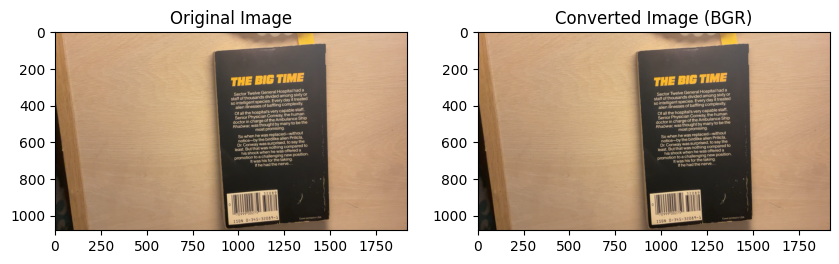

In [89]:
# Convert the image to BGR565 format
image_bgr565 = cv2.cvtColor(image_org, cv2.COLOR_BGR2BGR565)

# Convert it back to BGR format
image_bgr = cv2.cvtColor(image_bgr565, cv2.COLOR_BGR5652BGR)

# Display the original and converted images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
plt.title('Converted Image (BGR)')

plt.show()

In [90]:
read = easyocr.Reader(['en'])
res_bgr  = read.readtext(image_bgr)
res_bgr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[942, 214], [1366, 214], [1366, 314], [942, 314]],
  'thE dig TIME',
  0.22264166244672035),
 ([[1041, 307], [1359, 307], [1359, 351], [1041, 351]],
  'Twelve General Hospital had a',
  0.8849694137312368),
 ([[967, 326], [1046, 326], [1046, 357], [967, 357]],
  'Sector',
  0.999993916622258),
 ([[1135, 331], [1377, 331], [1377, 371], [1135, 371]],
  'divided among sixty or',
  0.9824651943229074),
 ([[951, 343], [1143, 343], [1143, 381], [951, 381]],
  'staff of thousands',
  0.8425831429412522),
 ([[1173, 352], [1378, 352], [1378, 391], [1173, 391]],
  'Every day it treated',
  0.9012713500460225),
 ([[952, 382], [984, 382], [984, 406], [952, 406]], 'SO', 0.3690802745364414),
 ([[975, 361], [1355, 361], [1355, 421], [975, 421]],
  'antelligees speciebafflinegcdaplereay',
  0.16539585283018435),
 ([[978, 395], [1126, 395], [1126, 428], [978, 428]],
  'alien illnesses',
  0.9901921189902372),
 ([[972, 432], [1068, 432], [1068, 460], [972, 460]],
  'Of all the',
  0.4909226914041004)

**GrayScaled Image pre-processing**

In [91]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

In [92]:
read = easyocr.Reader(['en'])
res_gray  = read.readtext(image_gray)
res_gray

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[942, 214], [1368, 214], [1368, 314], [942, 314]],
  'thE dig TIME',
  0.37234170771961883),
 ([[1114, 307], [1359, 307], [1359, 347], [1114, 347]],
  'General Hospitalhada',
  0.8228541218425148),
 ([[968, 324], [1120, 324], [1120, 356], [968, 356]],
  'Sector Twelve',
  0.9983878981436061),
 ([[1135, 331], [1377, 331], [1377, 371], [1135, 371]],
  'divided among sixty or',
  0.9824651943229074),
 ([[951, 343], [1144, 343], [1144, 381], [951, 381]],
  'staff of thousands',
  0.8157792574555691),
 ([[1173, 352], [1378, 352], [1378, 393], [1173, 393]],
  'Every day it treated',
  0.8864304605242276),
 ([[949, 361], [1355, 361], [1355, 421], [949, 421]],
  'so intelligees speciebafflinegcdaplerea',
  0.1988205551965023),
 ([[978, 395], [1126, 395], [1126, 428], [978, 428]],
  'alien illnesses',
  0.9901921189902372),
 ([[974, 432], [1068, 432], [1068, 460], [974, 460]],
  'Of all the',
  0.6873993151209039),
 ([[1062, 410], [1362, 410], [1362, 467], [1062, 467]],
  'hospitar s very ca

**images performance-comparison**

In [93]:
# Calculate total accuracy for each image
total_accuracy_original = sum([float(result[2]) for result in res_org]) / len(res_org)
total_accuracy_bgr = sum([float(result[2]) for result in res_bgr]) / len(res_bgr)
total_accuracy_gray = sum([float(result[2]) for result in res_gray]) / len(res_gray)

print(f' Original image total accuracy:{round(total_accuracy_original * 100, 3)}%')
print(f' bgr image total accuracy: {round(total_accuracy_bgr * 100, 3)}%')
print(f' Gray image total accuracy: {round(total_accuracy_gray * 100, 3)}%')


 Original image total accuracy:65.904%
 bgr image total accuracy: 67.982%
 Gray image total accuracy: 68.444%


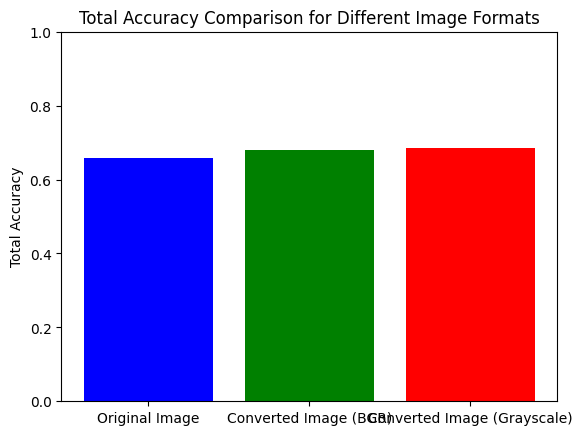

In [94]:
# Plotting the bar chart
labels = ['Original Image', 'Image BGR', 'Image Grayscale']
accuracies = [total_accuracy_original, total_accuracy_bgr, total_accuracy_gray]

plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1 for percentage
plt.ylabel('Total Accuracy')
plt.title('Total Accuracy Comparison for Different Image Formats')
plt.show()

In [95]:
max_accuracy_image = max(total_accuracy_original, total_accuracy_bgr, total_accuracy_gray)
    
if max_accuracy_image == total_accuracy_original:
        ocr_final_txt = ' '.join(result[1] for result in res_org)
elif max_accuracy_image == total_accuracy_bgr:
        ocr_final_txt = ' '.join(result[1] for result in res_bgr)
else:
        ocr_final_txt = ' '.join(result[1] for result in res_gray)

ocr_final_txt

'thE dig TIME General Hospitalhada Sector Twelve divided among sixty or staff of thousands Every day it treated so intelligees speciebafflinegcdaplerea alien illnesses Of all the hospitar s very capablestain Senior Physician Conwaythe Ship doerooin charge otthe Abaranceshhe Rhabwar; wasthought by many most promising  So when he was replacecn Piihoiat notice ~by the birdlike alien was surprised, to say the Dr Conway nothing compared to least Butthat was offered a his shock when he was to achallenging new It was his for the taking If he had the nerve 3208 9 148999 88275 IUS Isbn 0-345-32089-1 Covor position. promotion Dnicumn'

# **Text processing**

**Import libraries**

In [1]:
import pandas as pd
import re
import difflib

**Import necessary dataset(s)**

In [2]:
words_en_data = pd.read_csv("D:\Dataset\EnglishWords_dataset\words_pos.csv")

**Data pre-processing**

In [3]:
words_en_data.shape

(370100, 3)

In [99]:
words_en_data.head()

,Unnamed: 0,word,pos_tag
0,0,aa,NN
1,1,aaa,NN
2,2,aah,NN
3,3,aahed,VBN
4,4,aahing,VBG


In [100]:
words_en = words_en_data['word'].to_list()

**clean the text**

In [101]:
ocr_final_txt = re.sub(r'[^A-Za-z\s]', '', ocr_final_txt)
ocr_final_txt = ocr_final_txt.lower()
ocr_final_txt = re.sub(r'\s+', ' ', ocr_final_txt )
ocr_final_txt

'the dig time general hospitalhada sector twelve divided among sixty or staff of thousands every day it treated so intelligees speciebafflinegcdaplerea alien illnesses of all the hospitar s very capablestain senior physician conwaythe ship doerooin charge otthe abaranceshhe rhabwar wasthought by many most promising so when he was replacecn piihoiat notice by the birdlike alien was surprised to say the dr conway nothing compared to least butthat was offered a his shock when he was to achallenging new it was his for the taking if he had the nerve ius isbn covor position promotion dnicumn'

**Example**

In [17]:
# Check if some words are found in this list
trg_word = 'inn'

if trg_word in words_en:
    print(f'"{trg_word}" is in the list!')
else:
    print(f'"{trg_word}" is not in the list.')

"inn" is in the list!


**Words correction**

In [102]:
def correct_sentence(paragraph, words_list):
    corrected_paragraph = []
    
    for word in paragraph.split():
        if word in words_list:
            corrected_paragraph.append(word)
        else:
            closest_match = difflib.get_close_matches(word, words_list, n=1)
            
            if closest_match:
                replacement_word = closest_match[0]
                corrected_paragraph.append(replacement_word)
            else:
                corrected_paragraph.append(word)
                
    corrected_sentence = ' '.join(corrected_paragraph)
    return corrected_sentence

correct_sentence(ocr_final_txt, words_en)

'the dig time general hospital sector twelve divided among sixty or staff of thousands every day it treated so intelligences speciebafflinegcdaplerea alien illnesses of all the hospita s very capablest senior physician cowpath ship dolerin charge tythe abearance rhabarb washout by many most promising so when he was replace pithoi notice by the birdlike alien was surprised to say the dr cogway nothing compared to least butat was offered za his shock when he was to challenging new it was his for the taking if he had the nerve pius isn cover position promotion unicum'

# **Summarizer API (Chat GPT)**

In [103]:
import requests

url = "https://open-ai21.p.rapidapi.com/conversationgpt35"

payload = {
	"messages": [
		{
			"role": "user",
			"content": correct_sentence(ocr_final_txt, words_en) + "explain this briefly and in a very simple way"
		}
	],
	"web_access": False,
	"system_prompt": "",
	"temperature": 0.9,
	"top_k": 5,
	"top_p": 0.9,
	"max_tokens": 256
}
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "b865073daemshf674c7a23a93a1cp19e6f1jsnf23ac36a8ac7",
	"X-RapidAPI-Host": "open-ai21.p.rapidapi.com"
}

response = requests.post(url, json=payload, headers=headers)

print(response.json())

{'result': "The General Hospital Sector Twelve has a team of over 60 physicians who work together to treat patients with various illnesses. One such physician is Dr. Cogway, who specializes in treating rare and complex conditions that no other doctor in the hospital can handle. When Dr. Cogway was replaced by an alien being from another planet, he felt intimidated at first because the alien seemed to have abilities beyond what humans possess. However, the alien reassured him that these powers were not meant to take away from Dr. Cogway's role as the lead expert in the hospital. Instead, they were simply meant to complement his skills and allow him to provide even better care to his patients. This gave Dr. Cogway the opportunity to learn something new and potentially advance his career, which he took advantage of and ended up receiving a promotion.", 'status': True, 'server_code': 1}
